In [1]:
"""
To avoid a lot of noise from running the model, we ignore warnings for this model.

This is because the ARIMA procedure uses internal optimizations to find a set of coefficients for the
model - this might result in an exception since we are using a grid search.
"""

'\nTo avoid a lot of noise from running the model, we ignore warnings for this model.\n\nThis is because the ARIMA procedure uses internal optimizations to find a set of coefficients for the\nmodel - this might result in an exception since we are using a grid search.\n'

In [2]:
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

<ipython-input-2-1190da9f4589>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
warnings.filterwarnings('ignore')

In [4]:
def evaluate_ARIMA(X, arima_order):
    #preparing the training set
    train_size = int(len(X) * 0.66)
    train, test = X[:train_size], X[train_size:]
    history = [x for x in train]
    #making predictions using the model
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast() [0]
        predictions.append(yhat)
        history.append(test[t])
     #calculating the out-of-sample error   
    rmse = sqrt(mean_squared_error(test, predictions))
    pyplot.plot(test)
    pyplot.plot(predictions, color ='red')
    pyplot.show()
    
    return rmse

In [5]:
#passing different values for the model's parameters
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse =evaluate_ARIMA(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
    

In [6]:
#loading the dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('arimats.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


In [7]:
#evaluate different parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.643
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.787
ARIMA(1, 0, 2) RMSE=76.999
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.689
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.498
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.846
ARIMA(2, 2, 2) RMSE=80.808
ARIMA(4, 0, 0) RMSE=100.975
ARIMA(4, 0, 1) RMSE=101.566
ARIMA(4, 0, 2) RMSE=97.438
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.818
ARIMA(4, 1, 2) RMSE=84.205
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.141
ARIMA(6, 0, 0) 

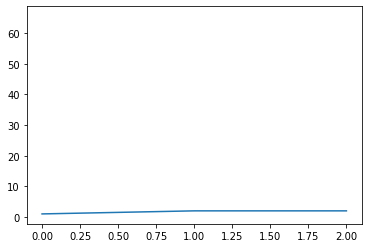

In [8]:
evaluate_models(series.values, p_values, d_values, q_values)